# House Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load and Unzip the Dataset

###First, we'll load and unzip the dataset.

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('housing.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Loading the Dataset

In [ ]:
df =pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Cleaning

### We will handle missing values, remove duplicates, and perform basic data cleaning.

In [ ]:
# Checking for missing values
print("Missing values:\n", df.isnull().sum())

# Dropping rows with missing values
df = df.dropna()

# Checking for duplicates
print("Duplicates:\n", df.duplicated().sum())

# Dropping duplicates
df = df.drop_duplicates()

# Display the first few rows of the cleaned dataset
df.head()


Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Duplicates:
 0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Feature Engineering and Selection

### Based on the available columns in housing.csv, we will create new features if relevant and select the columns for our model.

In [ ]:
# Displaying the columns of the dataset
columns = df.columns
print(columns)

# Selecting relevant features for house price prediction
# For this project, we'll assume that 'total_bedrooms', 'total_rooms', and 'median_income' are available
features = ['total_bedrooms', 'total_rooms', 'median_income']
target = 'median_house_value'  # This is the target variable


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


### Displaying the first few rows of the selected features

In [ ]:
df_selected = df[features + [target]]
df_selected.head()

,total_bedrooms,total_rooms,median_income,median_house_value
0,129.0,880.0,8.3252,452600.0
1,1106.0,7099.0,8.3014,358500.0
2,190.0,1467.0,7.2574,352100.0
3,235.0,1274.0,5.6431,341300.0
4,280.0,1627.0,3.8462,342200.0


##  Exploratory Data Analysis (EDA)

### Visualizing the relationships between selected features and the target variable.

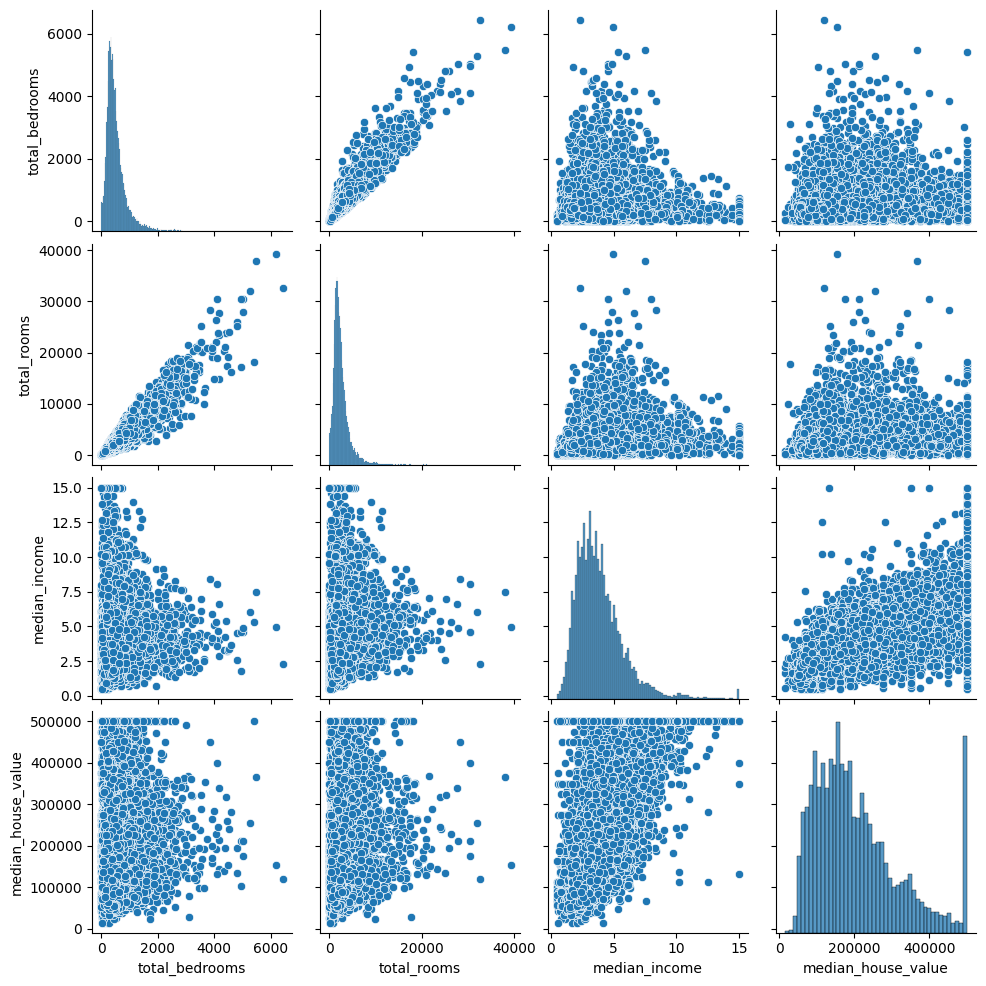

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(df_selected)
plt.show()

###  Correlation matrix

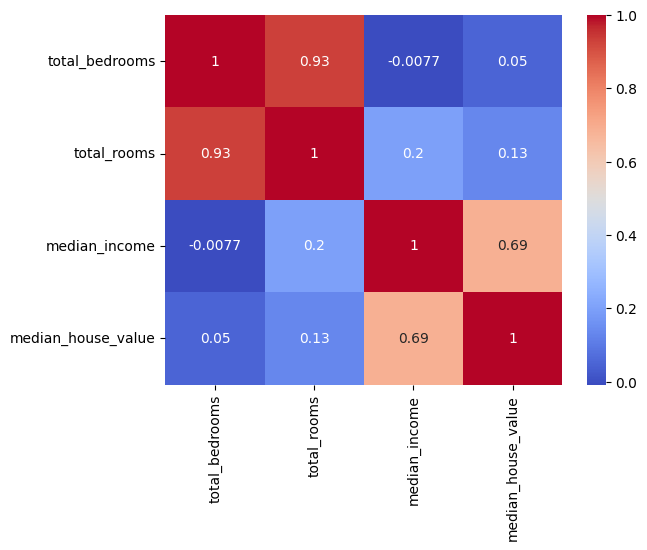

In [ ]:
corr_matrix = df_selected.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Building and Training the Model

### We will use a linear regression model to predict house prices with additional features.

###  Splitting the data into training and testing sets

In [ ]:
X = df_selected[features]
y = df_selected[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating and training the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting on the test set
y_pred = model.predict(X_test)

### Evaluating the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Test RMSE: {rmse}')

Test RMSE: 82039.81116849634


In [ ]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validation RMSE scores: {cv_rmse_scores}')
print(f'Mean CV RMSE: {cv_rmse_scores.mean()}')

Cross-validation RMSE scores: [76764.52395232 81975.78517569 79787.14837961 83453.93420119
 81154.23863076]
Mean CV RMSE: 80627.1260679151


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: {mae}')
print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'R-squared: {r2}')

Test MAE: 60555.63281198605
Test MSE: 6730530616.562536
Test RMSE: 82039.81116849634
R-squared: 0.5078287649821078


## Visualizing the Results

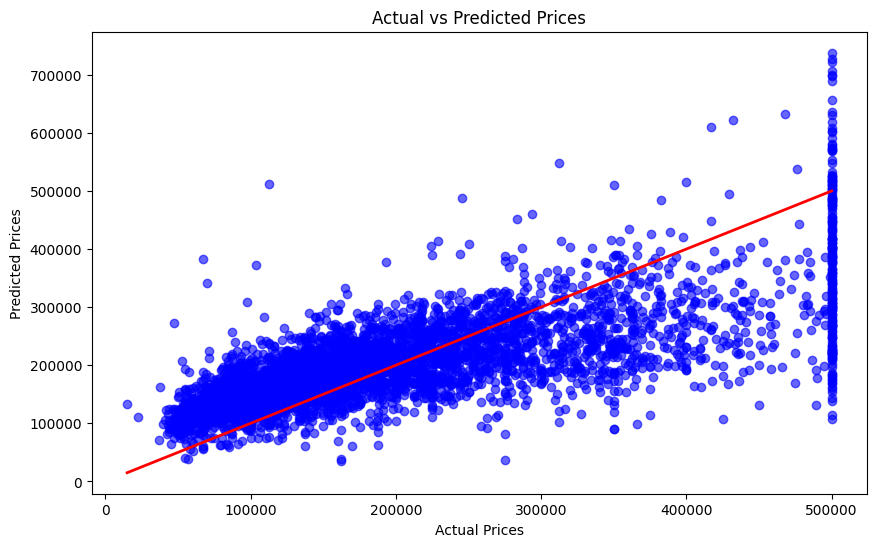

In [ ]:
# Plotting predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [ ]:
# Showing predicted vs actual outcomes in a tabular format
predictions_vs_actuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_vs_actuals.head())

         Actual      Predicted
14416  245800.0  182260.897457
16383  137900.0  214906.082359
7731   218200.0  192596.559916
1410   220800.0  158369.191014
1335   170500.0  242033.339422


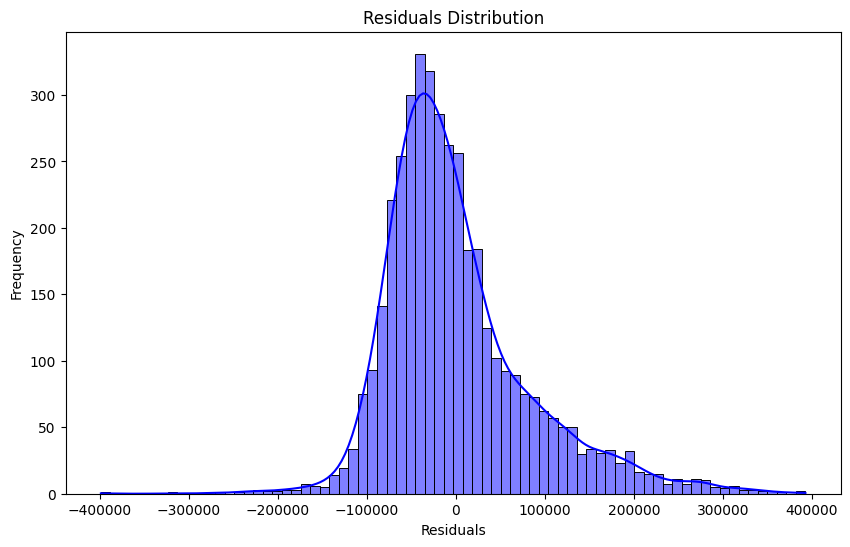

In [ ]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

#### In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In [65]:
# Creating a DataFrame for actual and predicted prices
predictions_vs_actuals = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Saving the DataFrame to Excel
predictions_vs_actuals.to_excel('predicted_prices.xlsx', index=False)
